# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn 
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.shape

(23699, 22)

In [3]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

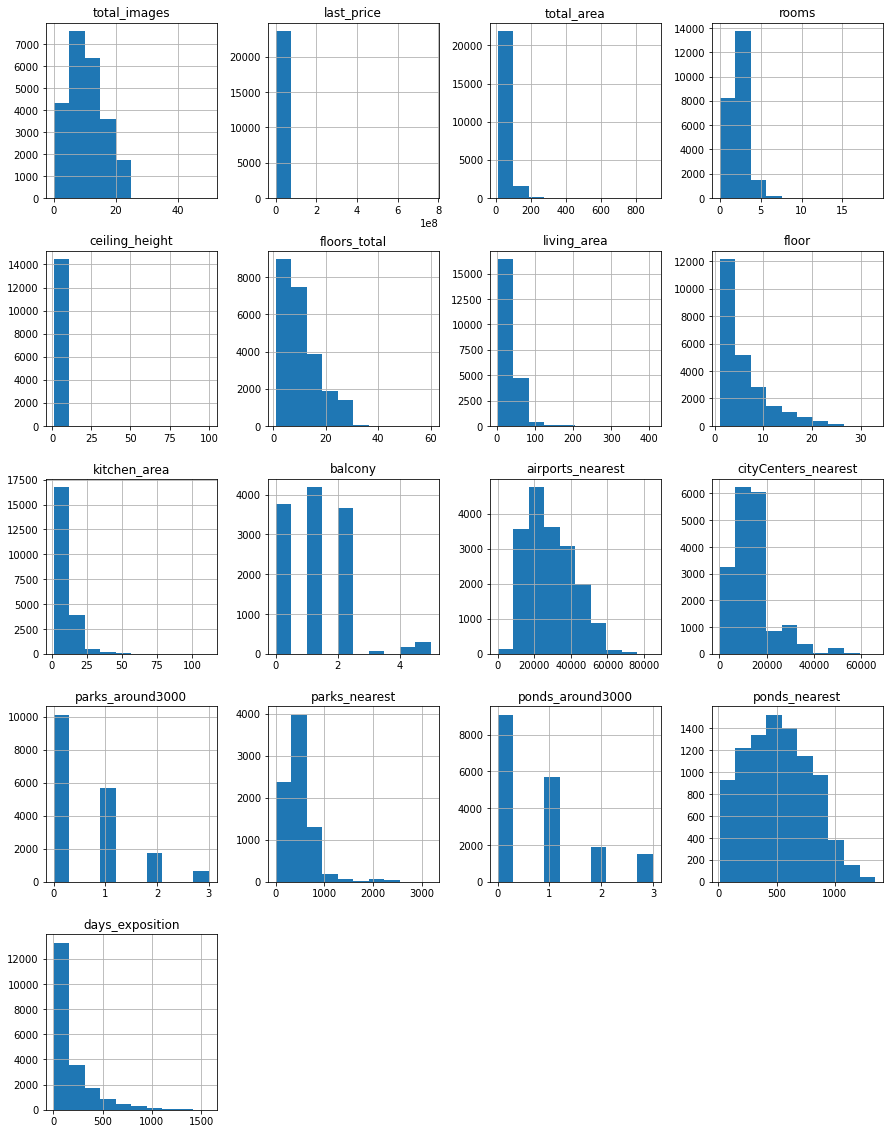

In [5]:
data.hist(figsize=(15, 20))

### Предобработка данных

**2.1 Найдите и изучите пропущенные значения в столбцах:**

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
#Проработаем численные данные и подставим медианые значения в пропусках.
#К ним я отнес ceiling_height,living_area,days_exposition
data['ceiling_height']=data['ceiling_height'].fillna(value=data['ceiling_height'].median())
data['living_area']=data['living_area'].fillna(value=data['living_area'].median())
#data['days_exposition']=data['days_exposition'].fillna(value=data['days_exposition'].median())

In [8]:
data['days_exposition'].isna().sum()

3181

In [9]:
#kitchen_area пропуски скорее всего из-за наличия квартир студий, у которых их нет. 
#А те пропуски, которые не прошли через первый фильтр я считаю правильно заполнить медианной, 
#т.к. площадь кухни на прямую не зависит от количества комнат и может быть маленькой в 3-шке и большой в 1-шке.
data.loc[data['studio'] == 'True','kitchen_area' ] = 0
data['kitchen_area']=data['kitchen_area'].fillna(value=data['kitchen_area'].median())

In [10]:
#is_apartment Т.к. общее число строк в датасете 23 699, а пропусков в признаке аппартаментов 20 2924, делаем вывод, 
#что пропуск означает обычные квартиры, потому как вторых на рынке в целом меньшенство и 
#при составлении таблицы такой признак не указывался авторами объявлений.
data['is_apartment'] = data['is_apartment'].fillna(value=False)

In [11]:
#balcony в пропусках выставляю 0, как и советовал брифинг
data['balcony'] = data['balcony'].fillna(value=0)

In [12]:
#parks_around3000 & ponds_around3000 заполню 0, т.к. скорее всего ни парков, ни водоемов рядом с этимми квартирами нет
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

In [13]:
#Интересный момент с locality_name.Т.к. пропусков всего 49, по-моему мнению лучше удалить эти строчки целиком. 
data.dropna(subset=['locality_name'], inplace=True)

In [14]:
#floors_total скорее всего 1-этажные квартиры, но их всего 86. 
#Поэтому считаю, что разумнее из убрать, чтобы небыло лишних вбросов
data['floors_total']=data['floors_total'].fillna(value='unknow')
data = data.loc[data['floors_total'] != 'unknow']


**2.2 Рассмотрите типы данных в каждом столбце:**

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  object 
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Приведу в цельночисловой формат ряд колонок, потому что это целые числа, а не объекты, визуально проще воспринимаются и появляется возможность производить вычисления. Так же приведу во временной формат **first_day_exposition** чтобы можно было проводить вычисления и строить графики. 

In [16]:
data['last_price'] = data['last_price'].astype('Int64')
data['floors_total'] = data['floors_total'].astype('Int64')
data['balcony'] = data['balcony'].astype('Int64')
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format ='%Y-%m-%dT%H:%M:%S')

**2.3 Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты.**

In [17]:
data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
#убераю,вводящие в заблуждения при вычислениях, лишнее в названия населенных пунктах и поселяю в новую колонку
data['locality_name_new']= data['locality_name'].replace('посёлок|деревня|коттеджный|село|поселок|городской|садовое|типа|товарищество|городского', '', regex=True)           

**2.4 Найдите и устраните редкие и выбивающиеся значения**

In [19]:
#посмотрим на уникальные значения
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [20]:
#Вычислим количество строчек в объявлениях которых высота потолка меньше или равно 2 метрам
data[data['ceiling_height'] <= 2]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
552,11,2999000,33.50,2017-03-30,1,2.00,15,17.5,6,False,...,0,Санкт-Петербург,33972.0,11746.0,1,520.0,1,949.0,270.0,Санкт-Петербург
2572,4,2400000,62.00,2018-12-27,3,2.00,5,40.0,4,False,...,1,Луга,NaN,NaN,0,NaN,0,NaN,NaN,Луга
4212,1,2120000,35.43,2017-12-18,1,2.00,18,16.6,9,False,...,2,Тосно,NaN,NaN,0,NaN,0,NaN,36.0,Тосно
5712,5,1500000,42.80,2017-08-14,2,1.20,2,27.5,1,False,...,0,городской посёлок Мга,NaN,NaN,0,NaN,0,NaN,248.0,Мга
5850,9,1650000,35.50,2018-05-29,1,2.00,5,30.0,5,False,...,0,Луга,NaN,NaN,0,NaN,0,NaN,100.0,Луга
11352,4,3300000,36.00,2017-06-18,1,2.00,17,15.2,12,False,...,0,посёлок Металлострой,25268.0,26980.0,0,NaN,0,NaN,53.0,Металлострой
16446,6,12300000,88.30,2019-03-12,3,2.00,5,63.9,2,False,...,0,Санкт-Петербург,38415.0,7675.0,1,568.0,1,154.0,NaN,Санкт-Петербург
16884,0,1500000,33.00,2018-10-03,1,2.00,5,20.0,5,False,...,0,Выборг,NaN,NaN,0,NaN,0,NaN,6.0,Выборг
16934,5,4100000,40.00,2017-10-17,1,1.75,37,17.4,5,False,...,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71.0,Санкт-Петербург
19098,7,2700000,56.00,2018-02-04,3,2.00,5,46.0,1,False,...,0,Выборг,NaN,NaN,0,NaN,0,NaN,282.0,Выборг


In [21]:
#тут не выходит и 1% процента в добавок цифра не правдоподобная, поэтому удаляем
data = data.loc[data['ceiling_height'] >2]            
#в данных где цифры больше 22.6, не правильно стоит точка, ее нужно сдвинуть вправо и будут похожие на реальность цифры
data.loc[(data["ceiling_height"] >= 22.6), "ceiling_height"] = data["ceiling_height"]/10
#посмотрим на конец полученного списка
data['ceiling_height'].value_counts().tail(60)

3.57     3
4.10     3
3.78     3
2.46     2
3.51     2
3.62     2
3.85     2
5.30     2
2.98     2
3.49     2
4.19     2
4.45     2
4.70     2
3.86     2
2.69     2
3.84     1
5.50     1
3.98     1
3.68     1
3.83     1
5.60     1
5.00     1
3.69     1
6.00     1
3.42     1
4.06     1
3.87     1
3.82     1
20.00    1
2.20     1
4.37     1
3.44     1
4.15     1
2.99     1
3.58     1
4.80     1
4.30     1
14.00    1
8.30     1
2.25     1
3.59     1
4.90     1
3.76     1
5.20     1
10.00    1
2.49     1
4.25     1
2.89     1
3.39     1
3.29     1
3.93     1
3.48     1
10.30    1
4.14     1
3.88     1
5.80     1
2.26     1
3.43     1
2.34     1
4.65     1
Name: ceiling_height, dtype: int64

In [22]:
#посмотрим на начало полученного списка
data['ceiling_height'].value_counts().head(50)
#принимаю решени убрать значния больше 4.10м
data = data.loc[data['ceiling_height'] <=4.10]   
data['ceiling_height'].sort_values().unique()

array([2.2 , 2.25, 2.26, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48, 2.49,
       2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 ,
       2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71,
       2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82,
       2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93,
       2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04,
       3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15,
       3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27,
       3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38,
       3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ,
       3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62,
       3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 ,
       3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95, 3.98,
       4.  , 4.06, 4.1 ])

In [23]:
#изучим остальные данные
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23501.000000,2.350100e+04,23501.000000,23501.000000,23501.000000,23501.000000,23501.000000,23501.000000,23501.000000,23501.000000,17994.000000,18014.000000,23501.000000,7998.000000,23501.000000,9003.000000,20342.000000
mean,9.875410,6.493767e+06,60.155781,2.068763,2.693876,10.684652,34.007129,5.880048,10.408866,0.593890,28802.792598,14209.735317,0.467725,490.688172,0.588741,518.435855,180.526841
std,5.679486,1.073951e+07,35.034380,1.076023,0.205197,6.594195,20.819018,4.873283,5.600034,0.960498,12642.605598,8611.208375,0.747215,341.816708,0.882843,278.087932,219.467312
min,0.000000,1.219000e+04,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.300000,0.000000,18551.000000,9267.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.626540e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26766.000000,13107.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.750000e+06,69.500000,3.000000,2.700000,16.000000,41.000000,8.000000,11.400000,1.000000,37288.000000,16293.000000,1.000000,612.000000,1.000000,730.500000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,4.100000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В глаза сразу бросается 900 в колонке total_area, когда 75% это 69,5. Тоже самое с rooms, floors_total, floor,kitchen_area.
5 балконов вполне может быть и дней экпозиции 1580 тоже ничего удивительного. Пока не буду их трогать, посмотрю на вышепречисленное.



<AxesSubplot:>

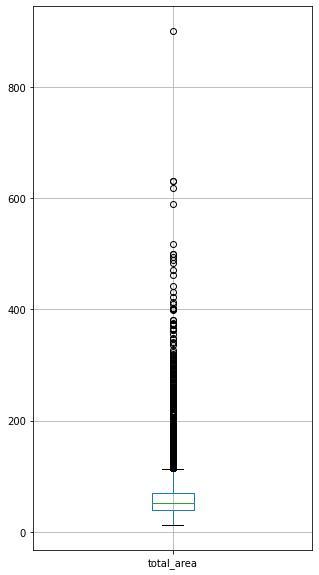

In [24]:
data.boxplot(column='total_area',figsize=(5, 10))

In [25]:
#Посмотрим сколько квартир больше 150 метров
data.loc[data['total_area']>150]
#всего 547. Не исключаю, что часть из них могут быть реальными объявлениями

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,Санкт-Петербург
42,13,22000000,161.8,2015-07-08,4,2.80,4,80.9,2,False,...,5,Петергоф,35416.0,30605.0,2,47.0,1,907.0,987.0,Петергоф
51,7,45000000,161.0,2017-10-17,3,3.20,8,38.0,4,False,...,0,Санкт-Петербург,32537.0,6589.0,0,NaN,3,99.0,541.0,Санкт-Петербург
121,20,33000000,180.0,2017-02-17,3,2.90,9,86.0,8,False,...,4,Санкт-Петербург,25689.0,4264.0,1,633.0,0,NaN,144.0,Санкт-Петербург
147,10,27700000,179.6,2017-07-06,5,2.85,25,97.2,25,False,...,2,Санкт-Петербург,19424.0,4489.0,0,NaN,1,806.0,75.0,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23400,17,30000000,213.0,2017-09-28,7,3.40,5,151.4,5,False,...,0,Санкт-Петербург,21146.0,1225.0,2,342.0,3,30.0,299.0,Санкт-Петербург
23448,3,14700000,180.0,2018-02-08,6,3.00,6,126.0,5,False,...,0,Санкт-Петербург,23955.0,5089.0,0,NaN,2,616.0,NaN,Санкт-Петербург
23491,20,21800000,250.0,2017-09-16,3,2.65,12,104.0,7,False,...,0,Санкт-Петербург,43558.0,13138.0,0,NaN,0,NaN,49.0,Санкт-Петербург
23549,5,19600000,184.0,2016-04-21,3,3.00,19,55.7,19,False,...,5,Санкт-Петербург,18995.0,4837.0,0,NaN,0,NaN,205.0,Санкт-Петербург


In [26]:
#Удаляю квартиры больше 150 метров
data = data.loc[data['total_area']<=150]
#Из боксплота видно что минимальня площадь квартиры порядком выше 0, пускай этих объявление не много, но думаю их 
#надо оставить т.к. в наше время таких объявления актуальны.

<AxesSubplot:>

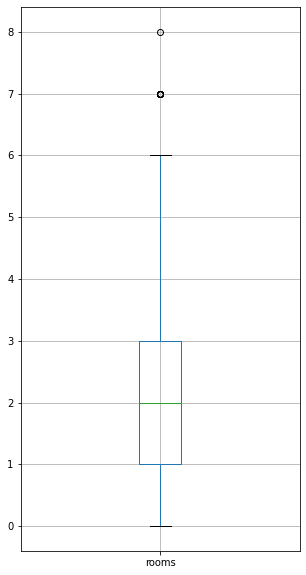

In [27]:
#Изучаем данные о комнатах, смотрим сколько объявлений где их больше 8
data.boxplot(column='rooms',figsize=(5, 10))

In [28]:
data.loc[data['rooms']>4].count()

total_images            209
last_price              209
total_area              209
first_day_exposition    209
rooms                   209
ceiling_height          209
floors_total            209
living_area             209
floor                   209
is_apartment            209
studio                  209
open_plan               209
kitchen_area            209
balcony                 209
locality_name           209
airports_nearest        186
cityCenters_nearest     186
parks_around3000        209
parks_nearest           117
ponds_around3000        209
ponds_nearest           107
days_exposition         159
locality_name_new       209
dtype: int64

In [29]:
#принимаю волевое решение убрать квартиры в которых больше 4 комнат, их всего 209
data = data.loc[data['rooms']<4]
#на ноль не обращаем внимание, это студии

<AxesSubplot:>

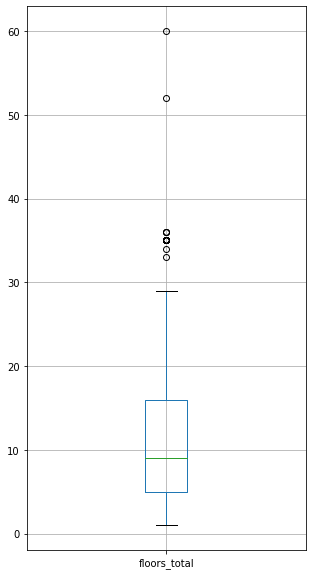

In [30]:
#переходим к этажности. Тоже не маловажный фактор влиящий на выбор
data.boxplot(column='floors_total',figsize=(5, 10))

In [31]:
data.loc[data['floors_total']>26]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,Мурино
20,12,6120000,80.00,2017-09-28,3,2.70,27,48.00,11,False,...,2,посёлок Парголово,53134.0,19311.0,0,NaN,0,NaN,74.0,Парголово
113,8,5750000,78.00,2016-05-19,3,2.65,27,45.40,27,False,...,2,посёлок Парголово,53134.0,19311.0,0,NaN,0,NaN,426.0,Парголово
324,0,6090000,62.00,2015-09-06,2,2.65,28,30.00,22,False,...,1,Санкт-Петербург,19971.0,21683.0,0,NaN,1,546.0,323.0,Санкт-Петербург
360,6,4990000,57.84,2018-08-22,2,2.65,27,30.00,13,False,...,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,60.0,Мурино
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23420,1,3345000,29.90,2018-08-09,1,2.65,27,20.30,3,False,...,1,посёлок Парголово,52912.0,19089.0,0,NaN,0,NaN,247.0,Парголово
23428,15,4750000,57.60,2016-12-15,2,2.65,27,30.80,26,False,...,0,посёлок Парголово,52726.0,18900.0,0,NaN,0,NaN,506.0,Парголово
23461,11,3195000,37.00,2017-06-14,1,2.65,27,18.00,16,False,...,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,66.0,Мурино
23463,10,3800000,40.70,2017-07-21,1,2.57,27,15.00,18,False,...,2,посёлок Парголово,53148.0,19325.0,0,NaN,0,NaN,30.0,Парголово


In [32]:
#убираем дама где больше 26 этажей
data = data.loc[data['floors_total']<26]

<AxesSubplot:>

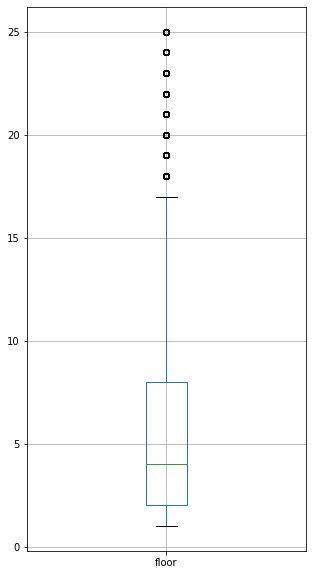

In [33]:
#ищем возможные аномали в этажах
data.boxplot(column='floor',figsize=(5, 10))
#максимально возможный вариант 25, значит ошибок нет

<AxesSubplot:>

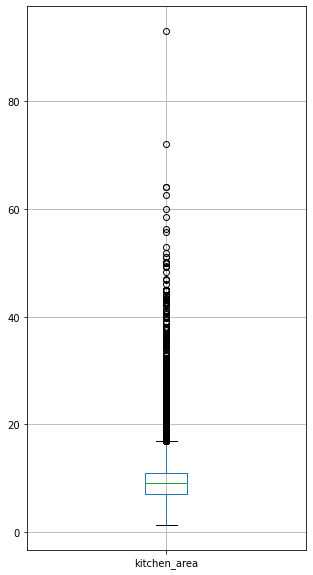

In [34]:
#Смотрим на кухни
data.boxplot(column='kitchen_area',figsize=(5, 10))

In [35]:
data.loc[data['kitchen_area']>25]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,Санкт-Петербург
137,11,13310800,85.1,2018-01-01,2,2.70,10,31.52,5,False,...,1,Санкт-Петербург,31460.0,4263.0,1,141.0,3,133.0,340.0,Санкт-Петербург
239,16,22000000,119.0,2017-02-16,3,3.50,5,56.00,3,False,...,0,Санкт-Петербург,21698.0,2004.0,1,688.0,1,86.0,77.0,Санкт-Петербург
263,12,39900000,140.6,2016-11-19,2,3.50,8,39.80,7,False,...,4,Санкт-Петербург,32537.0,6589.0,0,NaN,3,99.0,NaN,Санкт-Петербург
375,20,25000000,140.0,2017-11-25,3,2.80,25,60.00,21,False,...,4,Санкт-Петербург,37199.0,12721.0,0,NaN,0,NaN,188.0,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22818,8,4980000,92.0,2015-07-10,2,2.90,15,46.00,2,False,...,2,Колпино,26956.0,32742.0,1,276.0,2,509.0,476.0,Колпино
22948,10,34500000,100.0,2018-06-26,3,2.65,7,34.20,3,False,...,0,Санкт-Петербург,25754.0,5961.0,3,125.0,0,NaN,NaN,Санкт-Петербург
22994,19,20900000,120.4,2018-08-14,3,2.65,6,63.90,2,False,...,0,Санкт-Петербург,24510.0,4916.0,2,445.0,0,NaN,226.0,Санкт-Петербург
23134,4,12900000,118.0,2016-01-20,3,3.00,6,53.00,6,False,...,0,Санкт-Петербург,23476.0,4258.0,0,NaN,0,NaN,332.0,Санкт-Петербург


In [36]:
#Принимаю решение удалить варианты с кухней больше 25м
data = data.loc[data['kitchen_area']<25]
#И смотрим сколько строчек осталось
data.shape
#Я убрал 2 674 строки, что составляет 11%. Много это или мало, осознать мне не позволяет отсутсвие опыта

(21025, 23)

### Посчитайте и добавьте в таблицу новые столбцы

**3.1 цена одного квадратного метра**

In [37]:
data['cost_m2']=data['last_price']/data['total_area']
data['cost_m2']= data['cost_m2'].apply(np.ceil) 
data['cost_m2'] = data['cost_m2'].astype('Int64')
data['cost_m2']

1         82921
2         92786
5         95066
7        110545
9         88525
          ...  
23694     72491
23695     52543
23696     44092
23697    149512
23698     41796
Name: cost_m2, Length: 21025, dtype: Int64

**3.2 день недели публикации объявления**

In [38]:
data['day_of_week'] = data['first_day_exposition'].dt.day_of_week

**3.3 месяц публикации объявления**

In [39]:
data['month'] = data['first_day_exposition'].dt.month

**3.4 год публикации объявления**

In [40]:
data['year'] = data['first_day_exposition'].dt.year

**3.5 тип этажа квартиры**

In [41]:
def floor_type(row):
    try:
        if row == 1:
            return 'первый'
        elif row == 25:
            return 'последний'
        elif 1 < row < 25:
            return 'другой'
    except:
        return 'ошибка'

data['floor_type'] = data['floor'].apply(floor_type)

**3.6 расстояние до центра города в километрах**

In [42]:
data['cityCenters_km'] = (data['cityCenters_nearest']/1000).round().astype('Int64')

### Проведите исследовательский анализ данных

**4.1 Изучите следующие параметры объектов:**

<AxesSubplot:>

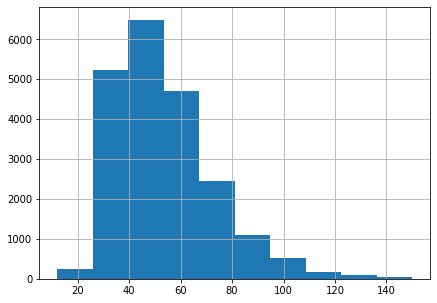

In [43]:
#общая площадь
data['total_area'].hist(figsize=(7, 5))

Самая распространненая площадь квартир от 40 до 55 метров, далее 25 до 40. 

<AxesSubplot:>

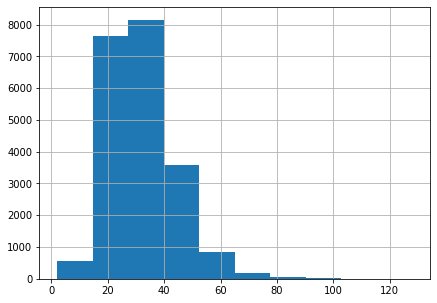

In [44]:
#жилая площадь
data['living_area'].hist(figsize=(7, 5))

Интересное замечание, что жилая площадь в большинтсве случаев имеет размеры от 15 до 40 метров. Меньше очень редко.

<AxesSubplot:>

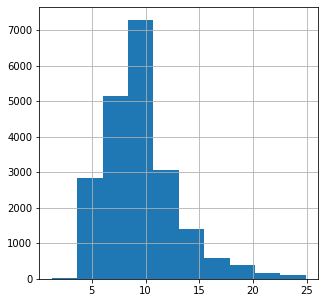

In [45]:
#площадь кухни;
data['kitchen_area'].hist(figsize=(5, 5))

Кухня чаще всего у всех стандартная размером от 8 до 11 метров

<AxesSubplot:>

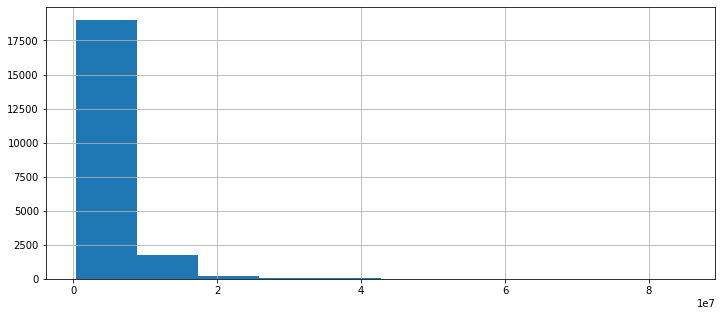

In [46]:
#цена объекта;
data['last_price'].hist(figsize=(12, 5))

Подавляющее количество квартир в диапозоне до 18 000, предложений до 2000 гораздо меньше.

<AxesSubplot:>

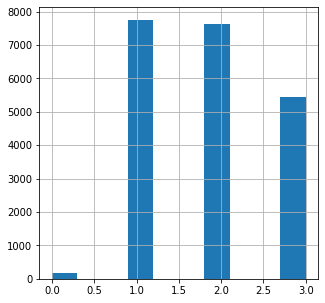

In [47]:
#количество комнат;
data['rooms'].hist(figsize=(5, 5))

Однушки чуть более популярны, чем двушки. Если бы данные брались за послдение 2 года, на втором месте были бы студии.

<AxesSubplot:>

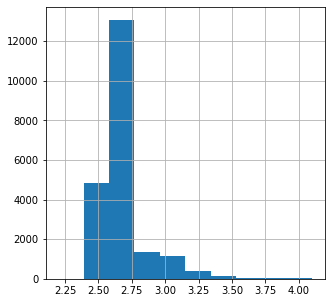

In [48]:
#высота потолков
data['ceiling_height'].hist(figsize=(5, 5))

Самый распространнеый вариант высоты потолка в райне 2,6-2,75 м

<AxesSubplot:>

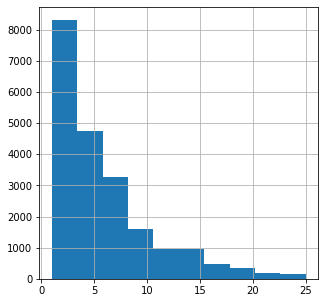

In [49]:
#этаж квартиры
data['floor'].hist(figsize=(5, 5))

Больше всего квартир продают с 1 по 3. Чем выше этаж, тем меньше объявлений 

<AxesSubplot:>

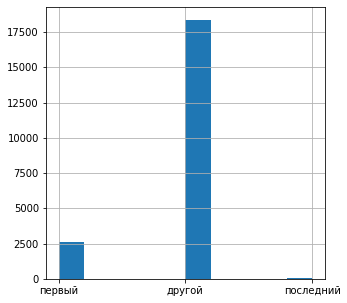

In [50]:
#тип этажа квартиры;
data['floor_type'].hist(figsize=(5, 5))

Объявлений на последнем этаже практически нет. На первом чаще, но все равно не так много, как остальных вариантов

<AxesSubplot:>

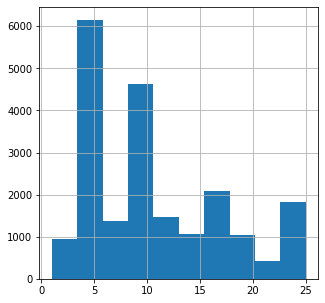

In [51]:
#общее количество этажей в доме
data['floors_total'].hist(figsize=(5, 5))

Самый часто встречающийся дом в объявлениях это 5-этажки.

<AxesSubplot:>

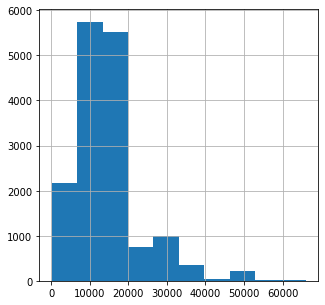

In [52]:
#расстояние до центра города в метрах;
data['cityCenters_nearest'].hist(figsize=(5, 5))

Большая часть квартир удалены от центра на расстоянии от 7 000 до 20 000 метров

<AxesSubplot:>

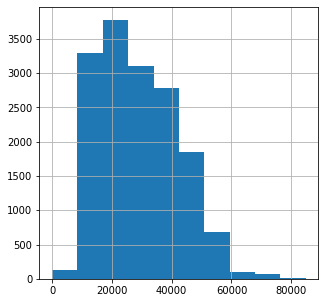

In [53]:
#расстояние до ближайшего аэропорта;
data['airports_nearest'].hist(figsize=(5, 5))

Большее количество квартир находятся от аэропорта на расстоянии от 10 до 40 км.

<AxesSubplot:>

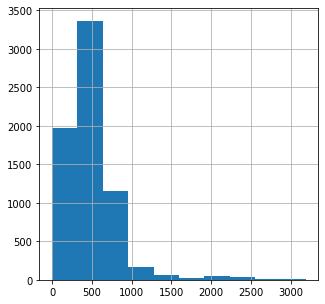

In [54]:
#расстояние до ближайшего парка;
data['parks_nearest'].hist(figsize=(5, 5))

<AxesSubplot:>

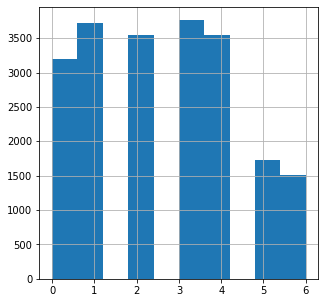

In [55]:
#день и месяц публикации объявления.
data['day_of_week'].hist(figsize=(5, 5))

Объявлениям занимаются в основном на буднях днях. В выходные публикаций гораздо меньше.

<AxesSubplot:>

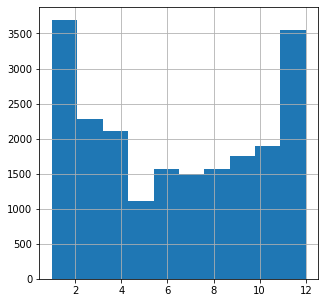

In [56]:
data['month'].hist(figsize=(5, 5))

Зимний период самый активный в публикациях объявлений. С ноября до февраля самы пиковые знанчения. На минимуме в майе.

**4.2 Изучите, как быстро продавались квартиры**

<AxesSubplot:>

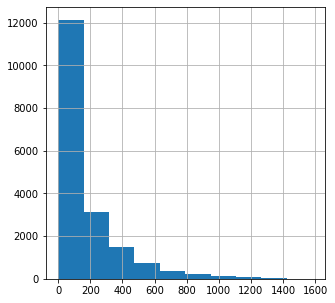

In [57]:
data['days_exposition'].hist(figsize=(5, 5))

In [58]:
data['days_exposition'].describe()

count    18383.000000
mean       173.500843
std        212.731368
min          1.000000
25%         44.000000
50%         91.000000
75%        218.500000
max       1580.000000
Name: days_exposition, dtype: float64

In [59]:
data['days_exposition'].median()

91.0

По гистрограмме видно, что подавляющее большинство объявлений держится до 180 дней. Среднее в данном диапазоне не информативно, т.к. есть необычно долгие публикации до 1400 дней. Медианно в данном случае показывает среднюю в 95 дней и по-моему этой цифре можно верить. 

**Какие продажи можно считать быстрыми, а какие — необычно долгими?**

Быстрой продажей можно считать сроки до медианного значения в 91 дней. Ну и долгий срок выходящий за пределы 180. Необычно долгим - превыщаищим обычно долгий в несколько раз.

**4.3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

<AxesSubplot:xlabel='total_area'>

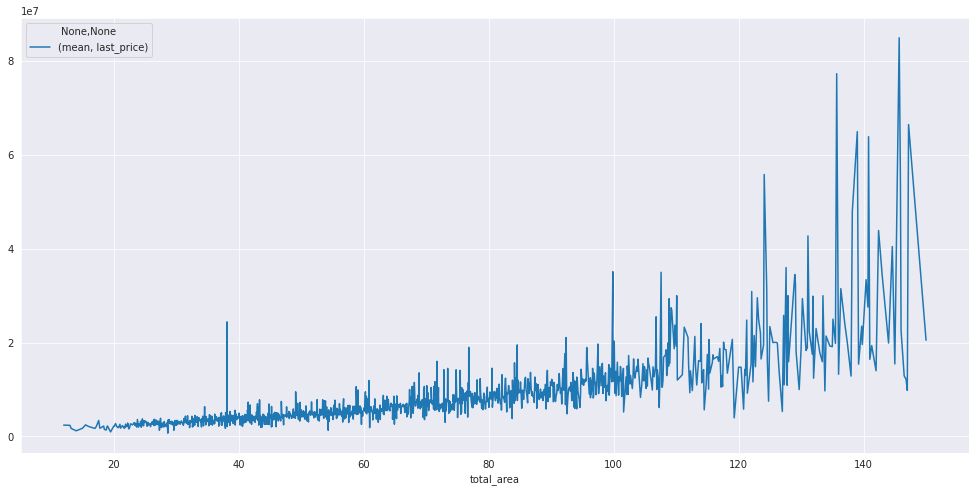

In [74]:
#Цена и общая площадь
data.pivot_table(index ='total_area',values='last_price', aggfunc=['mean']).plot(grid=True,figsize=(17, 8))


Зависимость между ценой и метражом очевидна, что подтверждает график. Интересное наблюдение заключается в том, что в районе 100м начинается проблемы с оценкой стоимости, т.к. спрос не велик на подобное жилье, что приводит к большому разбросу цен.

<AxesSubplot:xlabel='living_area'>

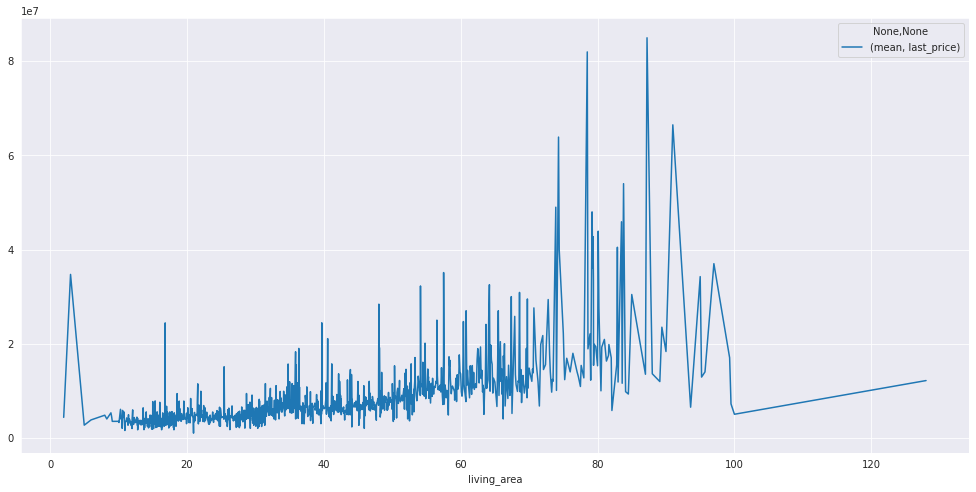

In [75]:
#Цена и жилая площадь
data.pivot_table(index ='living_area',values='last_price', aggfunc=['mean']).plot(grid=True,figsize=(17, 8))



Тут делаю такие же выводы, на основании прямой зависимости общей площади от жилой.

Можно обатить внимнаие на скачки в начале графика, но они скорее связаны из-за малого количетства данных, о каторых я указывал ранее.

<AxesSubplot:xlabel='kitchen_area'>

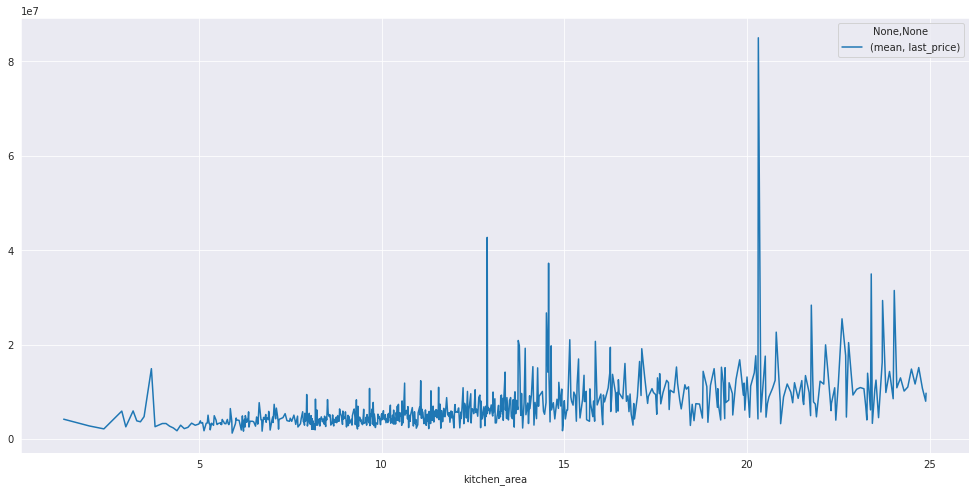

In [76]:
#Цена и площади кухни
data.pivot_table(index ='kitchen_area',values='last_price', aggfunc=['mean']).plot(grid=True,figsize=(17, 8))

Тут аналогичные вывод из 2-ух послендних иследований

<AxesSubplot:xlabel='rooms'>

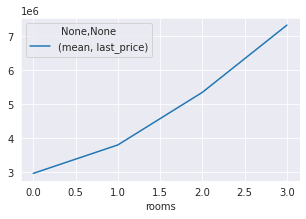

In [77]:
#Цена и количества комнат
data.pivot_table(index ='rooms',values='last_price', aggfunc=['mean']).plot(grid=True,figsize=(5, 3))

Тут точже очевидный  вывод. С количеством комнат растет и цена

<AxesSubplot:xlabel='floor_type'>

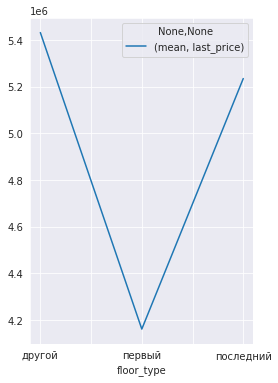

In [78]:
#Цена и этажа, на котором расположена квартира (первый, последний, другой);
data.pivot_table(index ='floor_type',values='last_price', aggfunc=['mean']).plot(grid=True,figsize=(4,6))

Самый дешевый получается первый этаж. Последний более примечателен, но все же чаще всего встрчаются этажи из категории другие, что вполне логично.

<AxesSubplot:xlabel='day_of_week'>

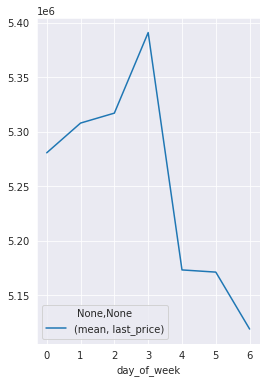

In [79]:
#Цена и даты размещения (день недели, месяц, год).
data.pivot_table(index ='day_of_week',values='last_price', aggfunc=['mean']).plot(grid=True,figsize=(4,6))

<AxesSubplot:xlabel='month'>

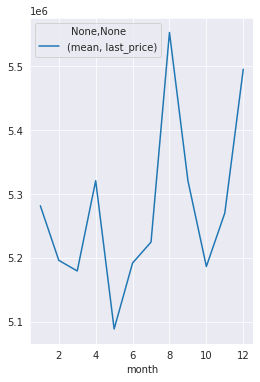

In [80]:
data.pivot_table(index ='month',values='last_price', aggfunc=['mean']).plot(grid=True,figsize=(4,6))

<AxesSubplot:xlabel='year'>

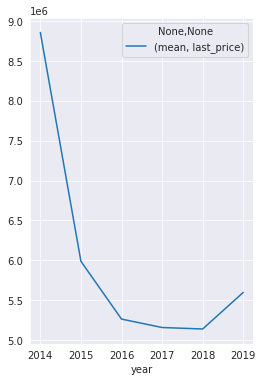

In [81]:
data.pivot_table(index ='year',values='last_price', aggfunc=['mean']).plot(grid=True,figsize=(4,6))

Из 3-х графиков видно, что в четверг люди размещают большего всего объявлений, потом дело идет на спад. Дела вывод, что все откладывают дела на пн. Когда в пн не получается, то на следующий день и так до контрольной точки четверг. 

По дням недели

Самая низкая цена в майе, в период минимальных размещений объявлений. 


по месяцам

Самая высокая цена в сентябре, после отпусков.

по годам

Рынок недвижимости проявляет активность в период финансовых потрясений. Ярким примером тут выступает 2014 года, после которого рынок идет на спад и начанает производить кореляцию начиная с 2018 года.

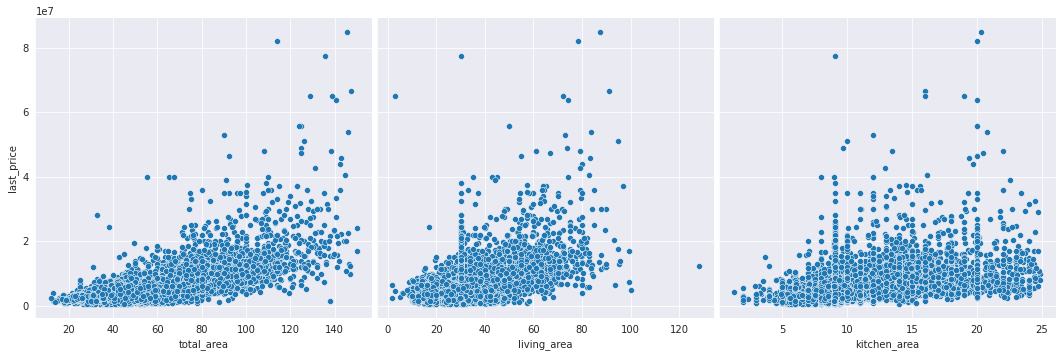

In [82]:
sbn.set_style('darkgrid')
sbn.pairplot(data, x_vars=['total_area','living_area','kitchen_area'], y_vars=['last_price'], height=5, kind='scatter')

**4.4 Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [69]:
#создаю переменную в которую помещаю обработанные имена и цены за квардратный метр
top10 = data.pivot_table(index = 'locality_name_new', values = 'cost_m2', aggfunc=['count','mean']) 
top10.columns = ['count','mean'] 

#сортирую по количеству и оставляю top10
top10 = top10.sort_values('count', ascending = False).head(10) 
top10

,count,mean
locality_name_new,,
Санкт-Петербург,13648,111457.503444
Мурино,467,85937.158458
Шушары,423,78919.640662
Всеволожск,380,68826.918421
Пушкин,337,102298.735905
Колпино,313,76125.680511
Гатчина,299,68397.765886
Кудрово,295,92694.545763
Выборг,213,58382.032864


<AxesSubplot:xlabel='locality_name_new'>

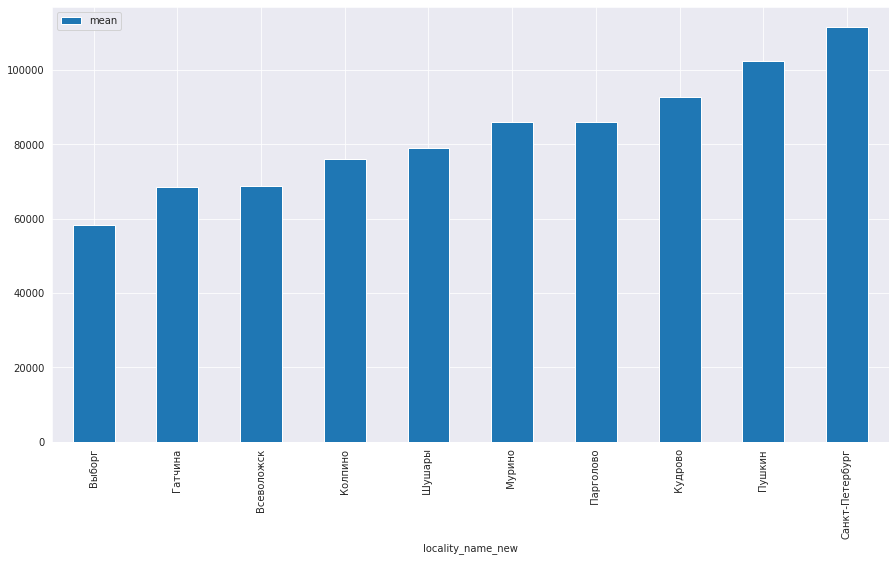

In [70]:
#Строю график для визуализации данных
top10.sort_values(by='mean').plot.bar(grid=True,figsize=(15,8),y='mean')

Самое дорогое жилье в Санкт-Петербурге, само дешевое в Выборге. Выборг находится в более 100 км от Сантк-Петербурга и тем не менее попал в выборку топ-10 вместе с сателитами Петербурга.

**4.5 Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра.**

In [71]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,cost_m2,day_of_week,month,year,floor_type,cityCenters_km
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,81.0,Шушары,82921,1,12,2018,первый,19
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,Санкт-Петербург,92786,3,8,2015,другой,14
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.4,5,False,...,0,NaN,55.0,Янино-1,95066,0,9,2018,другой,<NA>
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.0,22,False,...,0,NaN,NaN,Санкт-Петербург,110545,3,4,2019,другой,12
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.6,7,False,...,0,NaN,289.0,Санкт-Петербург,88525,6,2,2017,другой,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,3,381.0,NaN,Санкт-Петербург,72491,1,3,2017,другой,4
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,0,NaN,45.0,Тосно,52543,0,1,2018,другой,<NA>
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,0,NaN,NaN,Рождествено,44092,6,2,2018,первый,<NA>
23697,13,11475000,76.75,2017-03-28,2,3.00,17,30.0,12,False,...,3,196.0,602.0,Санкт-Петербург,149512,1,3,2017,другой,10


In [72]:
#Сделаю срез и помещю в переменную объявления из СПб
spb_center= data.query('locality_name_new == "Санкт-Петербург"')
#Сгруппирую по растоянию до центра и цене за квардратный метр. 
spb_center_pivot = spb_center.pivot_table(index = 'cityCenters_km', values = 'cost_m2', aggfunc=['mean']) 
spb_center_pivot

,mean
,cost_m2
cityCenters_km,
0,212668.928571
1,157507.481481
2,150984.210227
3,124192.326087
4,130881.561947
5,138420.070513
6,140426.819149
7,140052.564706


<AxesSubplot:xlabel='cityCenters_km'>

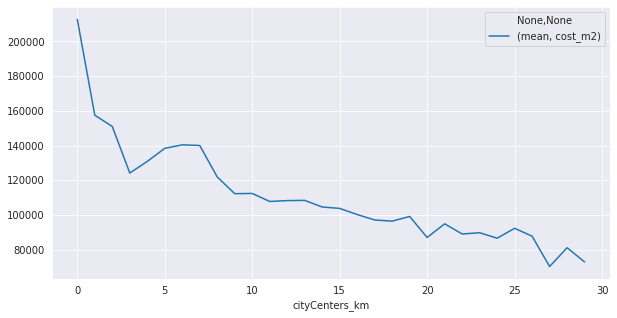

In [73]:
#Визуализирую данные взяв в кооридинатах км и среднеюю ценую за 1 кв метр жилья
spb_center_pivot.plot(grid=True,figsize=(10,5))

На графике видны очевидные вещи подходящие к каждому большому городу.

В центре самое дорогое жилье, далее идет спад и в районе 4 км появляют новые многоэтажные застройки которые и считаются городом
но не так привлекательны для жилья из-за плотной застройки. Далее идет небольшое повышени - это куротные районы в спб с парками
и водоемами. Ну а после стабильное понижение с ростом километража.

### Общий вывод

Хотя данных для дальнейщего анализа еще много. В общем и целом все выводы вполне очевидны и обычного жизненого опыта. 
На цену на недвижимость влияют множество факторов, но из тех, что я анализировал, хотел бы выделить следующее.

**1) Общая площадь и все на прямую взаимосвязанное: жилая площадь, кухня, количетсво комнат:** Интересное наблюдение заключается в том, что в районе 100м начинается проблемы с оценкой стоимости, т.к. спрос не велик на подобное жилье, что приводит к большому разбросу цен.


**2) Этаж**: чаще всего цены на первом этаже ниже. Это связанно с многоими факторами- вид из окна, возможные проблемы с канализацие, холодный пол, самый грязный этаж, через который проходят все жильцы дома и тд. Немного дешевле идет последний этаж, что связано с возможностями протечки, шума от вспомогательного оборудование, холодный потолок и и т.д.

**3) Время размещения:** По дням недели - в четверг люди размещают большего всего объявлений. По месяцам самые высокие цены в сентябре. А так же год размещения. Цена очень сильно зависит от экономического состояния государства. В какой-то период времени можно на этом даже можно заработать.

**4) Расстояние до центра:** Чем дальше от центра, тем цены пропорциоанально стремяться к понижению